In [19]:
import dask.dataframe as dd
import dask.array as da
import pandas as pd
import html
import re
from sklearn.feature_extraction.text import strip_accents_ascii, strip_accents_unicode
import matplotlib.pyplot as plt
import math

%matplotlib inline
numcores = 16
tiene_gpu = False
pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 100)

import os


In [20]:
data_root = 'C:/code/hotelmapping/data/'
clean_file = os.path.join(data_root, 'travcoding/Properties_clean.parquet')
df = dd.read_parquet(clean_file, engine='pyarrow')
df.index.size.compute()

523935

In [21]:
def get_word_stats(ddf, colum_name):   
    df2 = ddf[colum_name].str.split().explode().value_counts().reset_index().rename(columns={'index': 'word',colum_name:'cantidad'})    
    df2['freq'] = (df2.cantidad/df2.cantidad.sum())
    df2['idf']  = (da.log(1/df2.freq))
    return df2


In [22]:
column_name = 'propertyname'
property_name_stats = get_word_stats(df, column_name).compute()   
#property_name_stats.to_parquet('data/travcoding/property_name_stats.parquet',engine='pyarrow')



# Plot Stats for StopWords

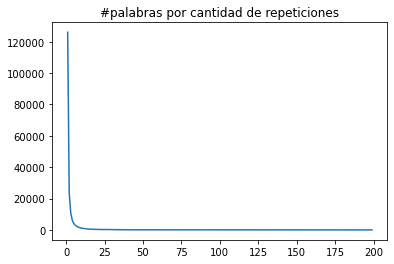

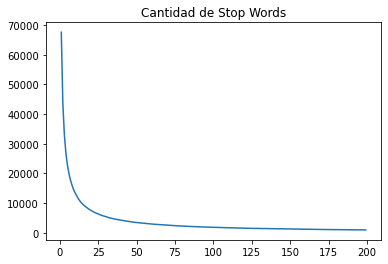

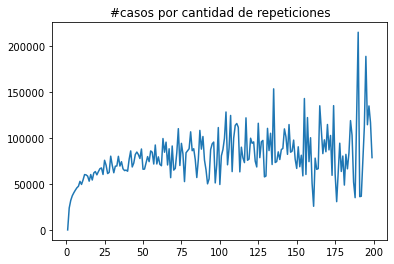

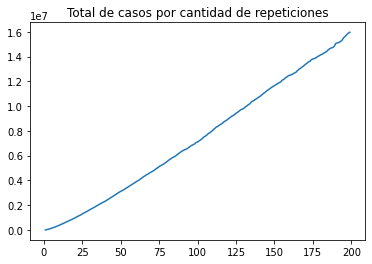

In [10]:

name_stats_cant = []
name_stats_value = []
cases = []

max_repetitiosns = 200
min_repetitiosns = 1


for i in range(min_repetitiosns,max_repetitiosns):
    value = property_name_stats[property_name_stats.cantidad == i].word.size
    name_stats_cant.append(i)  
    name_stats_value.append(value)
    cases.append(value * math.comb(i,2))


tot_cases = []
for i in range(min_repetitiosns,max_repetitiosns):
    tot_cases.append(sum(cases[:i]))
    
tot_stopwords = []
for i in range(min_repetitiosns,max_repetitiosns):
    value = property_name_stats[property_name_stats.cantidad > i].word.size
    tot_stopwords.append(value)


plt.plot(name_stats_cant, name_stats_value)
plt.title("#palabras por cantidad de repeticiones")
plt.show()

plt.plot(name_stats_cant, tot_stopwords)
plt.title("Cantidad de Stop Words")
plt.show()



plt.plot(name_stats_cant, cases)
plt.title("#casos por cantidad de repeticiones")
plt.show()

plt.plot(name_stats_cant, tot_cases)
plt.title("Total de casos por cantidad de repeticiones")
plt.show()





In [23]:
property_name_stats.head()

,word,cantidad,freq,idf
0,hotel,129740,0.061378,2.790708
1,inn,35503,0.016796,4.086623
2,in,30521,0.014439,4.237826
3,the,28296,0.013386,4.313520
4,by,28201,0.013341,4.316883


In [25]:
data_root = 'C:/code/hotelmapping/data/'
name_stats_file = os.path.join(data_root, 'travcoding/Properties_name_stats.csv')
property_name_stats.to_csv(name_stats_file)
